In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # ou DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report



In [3]:
import matplotlib.pyplot as plt


# ###################################
# Chargement des datas
# ###################################
dataEtudeSup = pd.read_csv('./data/etudes-superieurs.csv',sep=';',  dtype={0: str})
dataEtudeSup.head()  # Print the first rows of the dataframe









,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
dataEtudeSup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
dataEtudeSup.describe()

,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
print(dataEtudeSup.columns.tolist())

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


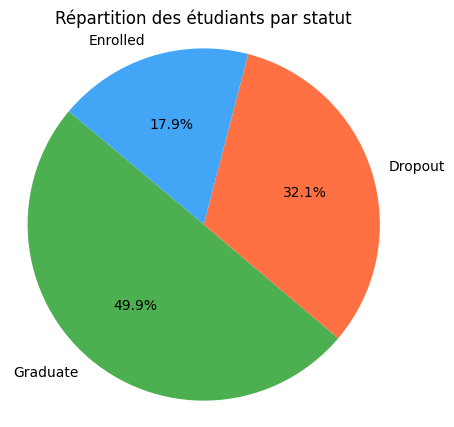

In [7]:
# ###################################
# target
# ###################################
target_counts = dataEtudeSup['Target'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    target_counts, 
    labels=target_counts.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=['#4CAF50', '#FF7043', '#42A5F5']  # couleurs optionnelles
)

plt.title("Répartition des étudiants par statut")
plt.axis('equal')  # Pour un cercle parfait
import plotly.graph_objects as go
plt.show()

In [8]:



gender_labels = ['F', 'M']
gender_values=dataEtudeSup['Gender'].value_counts().tolist()
fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels=gender_labels, values=gender_values, name='Gender Distribution',
                     marker_colors=["#4CAF50","#2CCED2"],hole=0.5),row=1, col=1)
att = dataEtudeSup.groupby(['Gender','Target']).agg(count =('Target','count')).reset_index()

fig.add_trace(go.Bar(x = att[att.Target =='Graduate']['Gender'], y = att[att.Target =='Graduate']["count"], 
                     name = 'Graduate',
    marker = dict(color="#4CAF50")),row=1, col=2) 
fig.add_trace(go.Bar(x = att[att.Target =='Dropout']['Gender'], y = att[att.Target =='Dropout']["count"], 
                     name = 'Dropout',
    marker = dict(color ="#FF7043")),row=1, col=2)
fig.add_trace(go.Bar(x = att[att.Target =='Enrolled']['Gender'], y = att[att.Target =='Enrolled']["count"], 
                     name = 'Enrolled',
    marker = dict(color ="#42A5F5")),row=1, col=2)

fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Distribution par genre</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.121, x1 = 0.435, y1 = 1.121)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))


fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=['0', '1'],
        ticktext=['Femme', 'Homme']
    )
)

fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

/home/jonathan/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.

/home/jonathan/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.



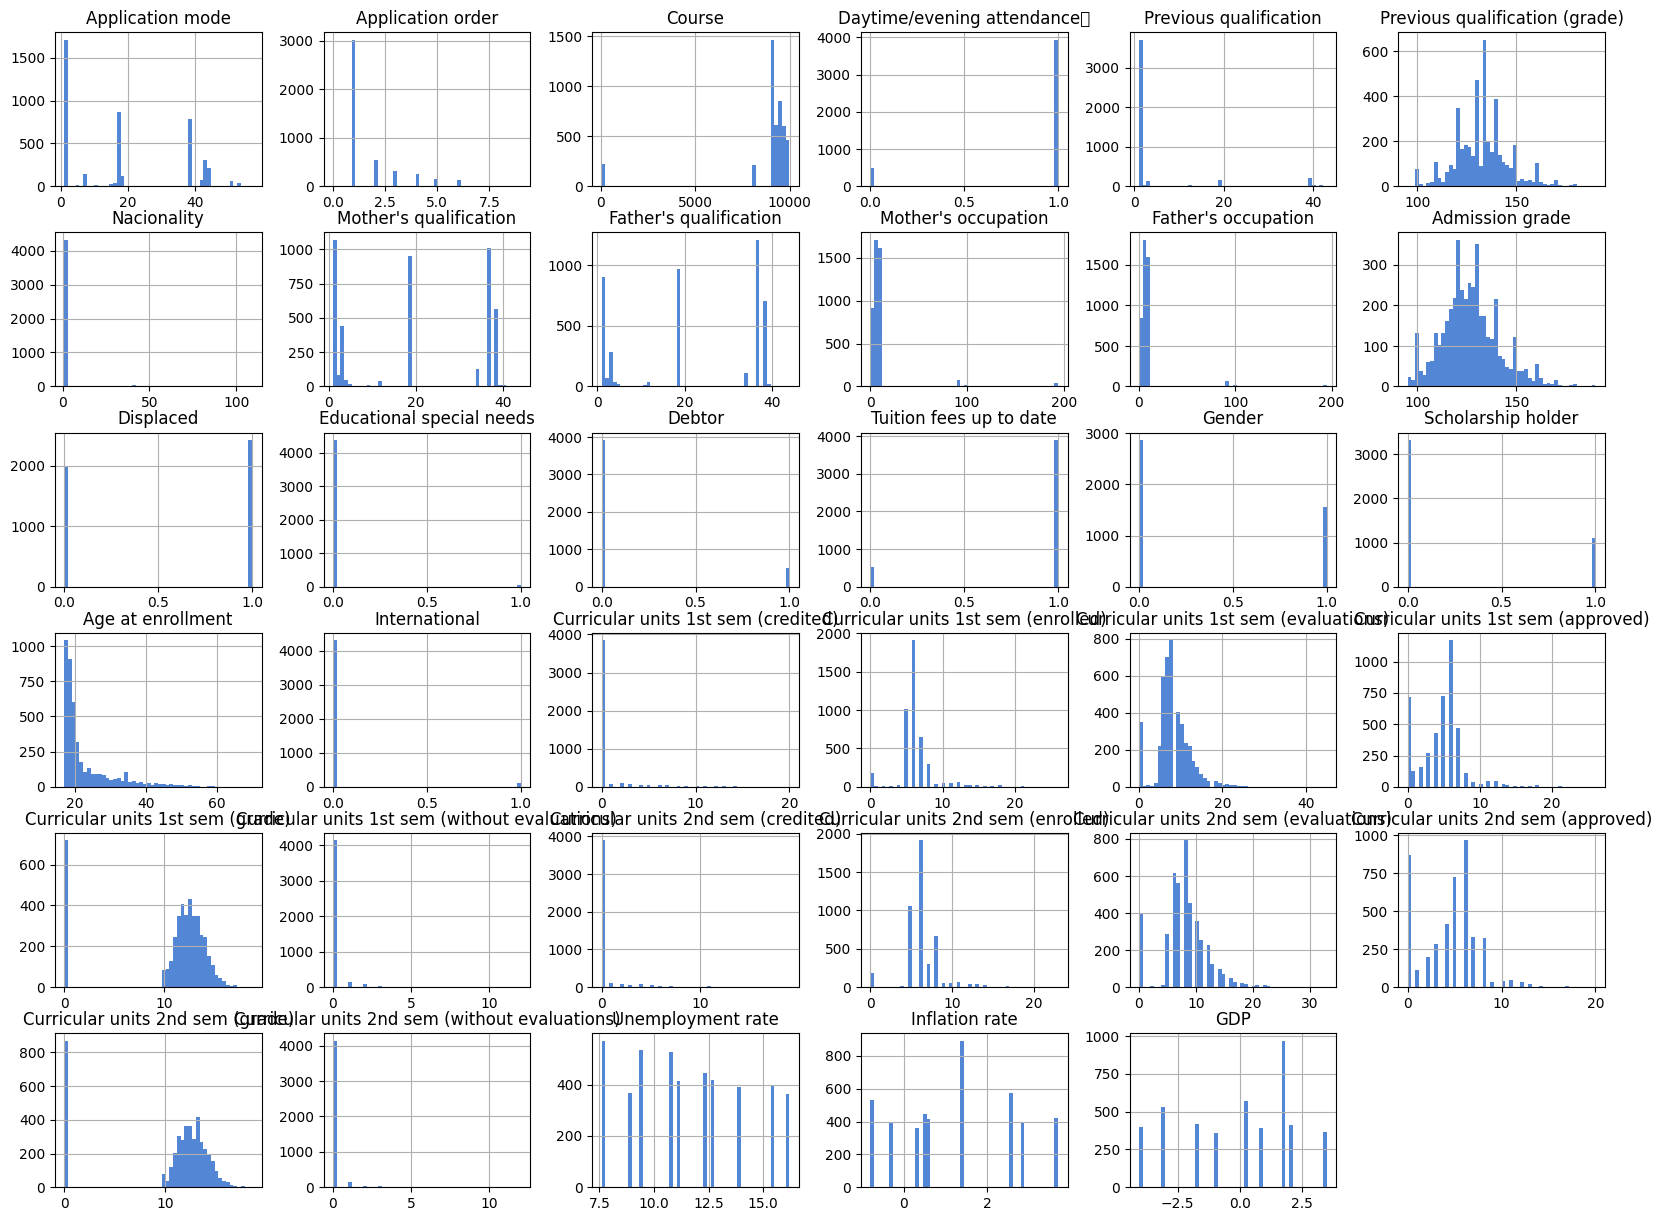

In [9]:
dataEtudeSup[dataEtudeSup.columns].hist(bins=50, figsize=(20,15), color='#5486d6')
plt.show

/home/jonathan/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.



<function matplotlib.pyplot.show(close=None, block=None)>

/home/jonathan/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.

/home/jonathan/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.



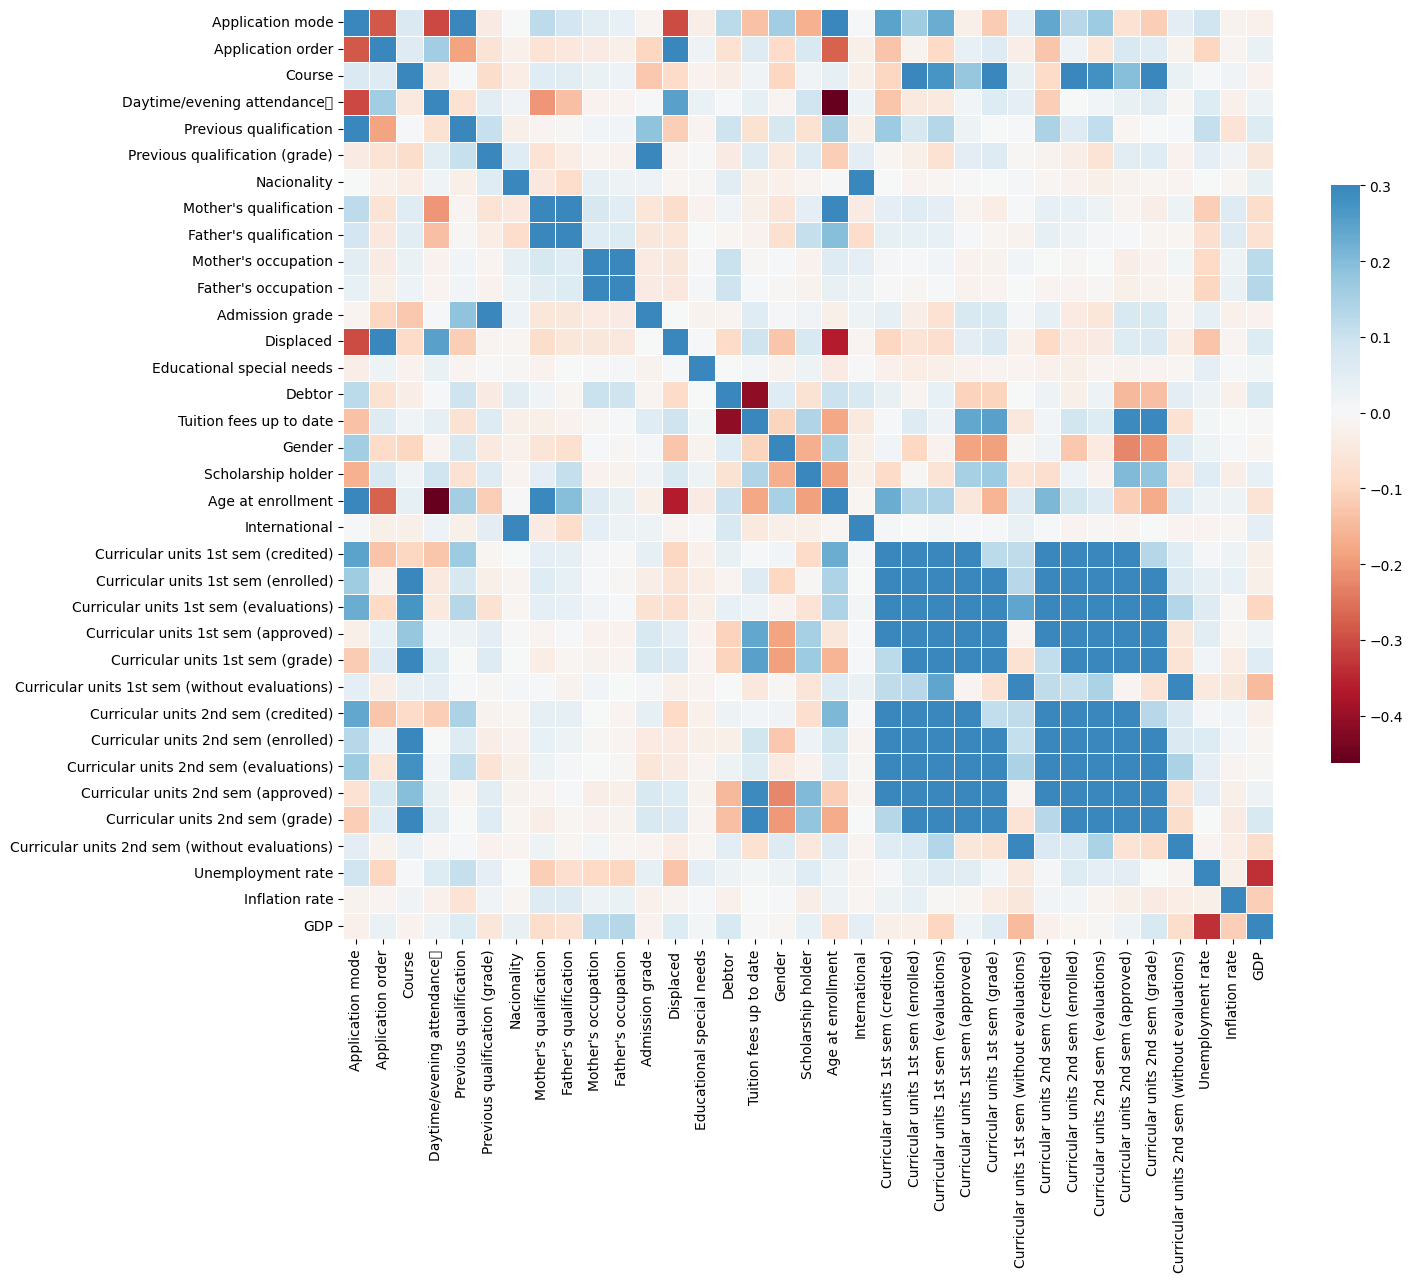

In [ ]:
# TODO : ajouter la colonne target

f = plt.figure(figsize=(15, 15))
df_numeric = dataEtudeSup.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=False, cmap='RdBu',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show

In [11]:
dataEtudeSup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:

dataEtudeSup = dataEtudeSup.dropna()  
# dataEtudeSup = pd.get_dummies(dataEtudeSup) 

dataEtudeSup['Target'] = dataEtudeSup['Target'].apply(lambda x: 'Dropout' if x == 'Dropout' else 'Other')


colonnes_a_supprimer = [col for col in dataEtudeSup.columns if col.startswith('Curricular')]
#colonnes_a_supprimer = [col for col in dataEtudeSup.columns if col.startswith('Curricular units 2')]
colonnes_a_supprimer.append('Tuition fees up to date')
X = dataEtudeSup.drop(colonnes_a_supprimer, axis=1)



X = X.drop(['Target'], axis=1)  
y = dataEtudeSup['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





Accuracy : 0.7864406779661017
              precision    recall  f1-score   support

     Dropout       0.80      0.54      0.64       316
       Other       0.78      0.92      0.85       569

    accuracy                           0.79       885
   macro avg       0.79      0.73      0.75       885
weighted avg       0.79      0.79      0.77       885



In [29]:
#Etape 1 
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.7864406779661017
              precision    recall  f1-score   support

     Dropout       0.80      0.54      0.64       316
       Other       0.78      0.92      0.85       569

    accuracy                           0.79       885
   macro avg       0.79      0.73      0.75       885
weighted avg       0.79      0.79      0.77       885



In [13]:
#etape 2, on ajouter class_weight={'Dropout': 2, 'Other': 1}

model = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.7875706214689265
              precision    recall  f1-score   support

     Dropout       0.68      0.78      0.72       316
       Other       0.86      0.79      0.83       569

    accuracy                           0.79       885
   macro avg       0.77      0.78      0.78       885
weighted avg       0.80      0.79      0.79       885



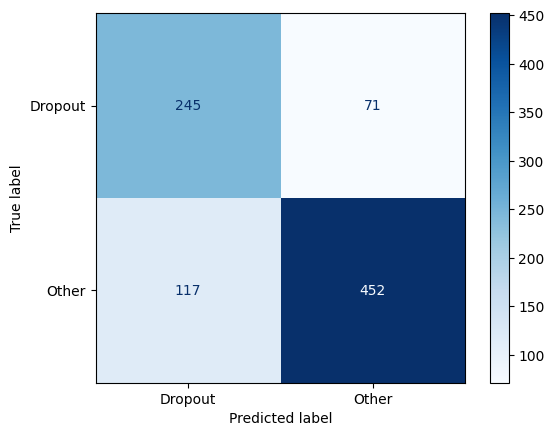

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Other'])
disp.plot(cmap='Blues')
plt.show()

In [15]:
import pandas as pd

# Récupère l’importance des features
importances = model.feature_importances_

# Crée une série pandas indexée par les noms des colonnes
features = pd.Series(importances, index=X.columns)

# Trie par importance décroissante et affiche les 10 premières
print(features.sort_values(ascending=False).head(10))

Curricular units 1st sem (approved)    0.718427
Debtor                                 0.061035
Curricular units 1st sem (enrolled)    0.053998
Curricular units 1st sem (grade)       0.024486
Curricular units 1st sem (credited)    0.022640
Admission grade                        0.020638
Age at enrollment                      0.019394
Scholarship holder                     0.017109
Gender                                 0.013092
Application mode                       0.012797
dtype: float64


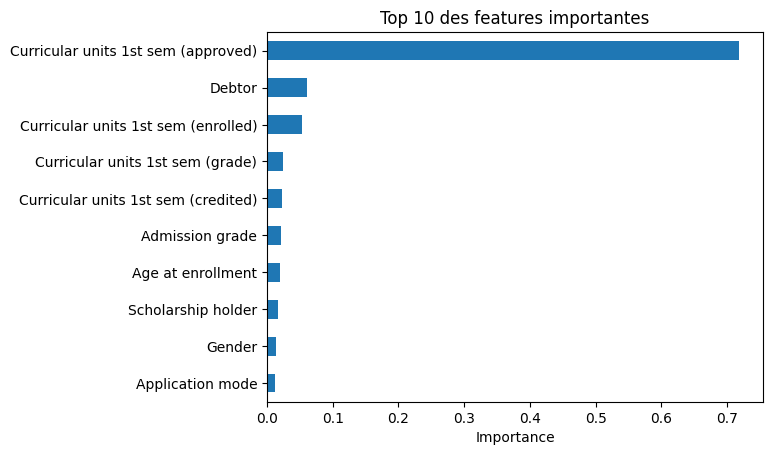

In [16]:
import matplotlib.pyplot as plt

features.sort_values(ascending=False).head(10).plot(kind='barh')
plt.gca().invert_yaxis()  # Inverse l’ordre pour avoir la plus importante en haut
plt.xlabel('Importance')
plt.title('Top 10 des features importantes')
plt.show()

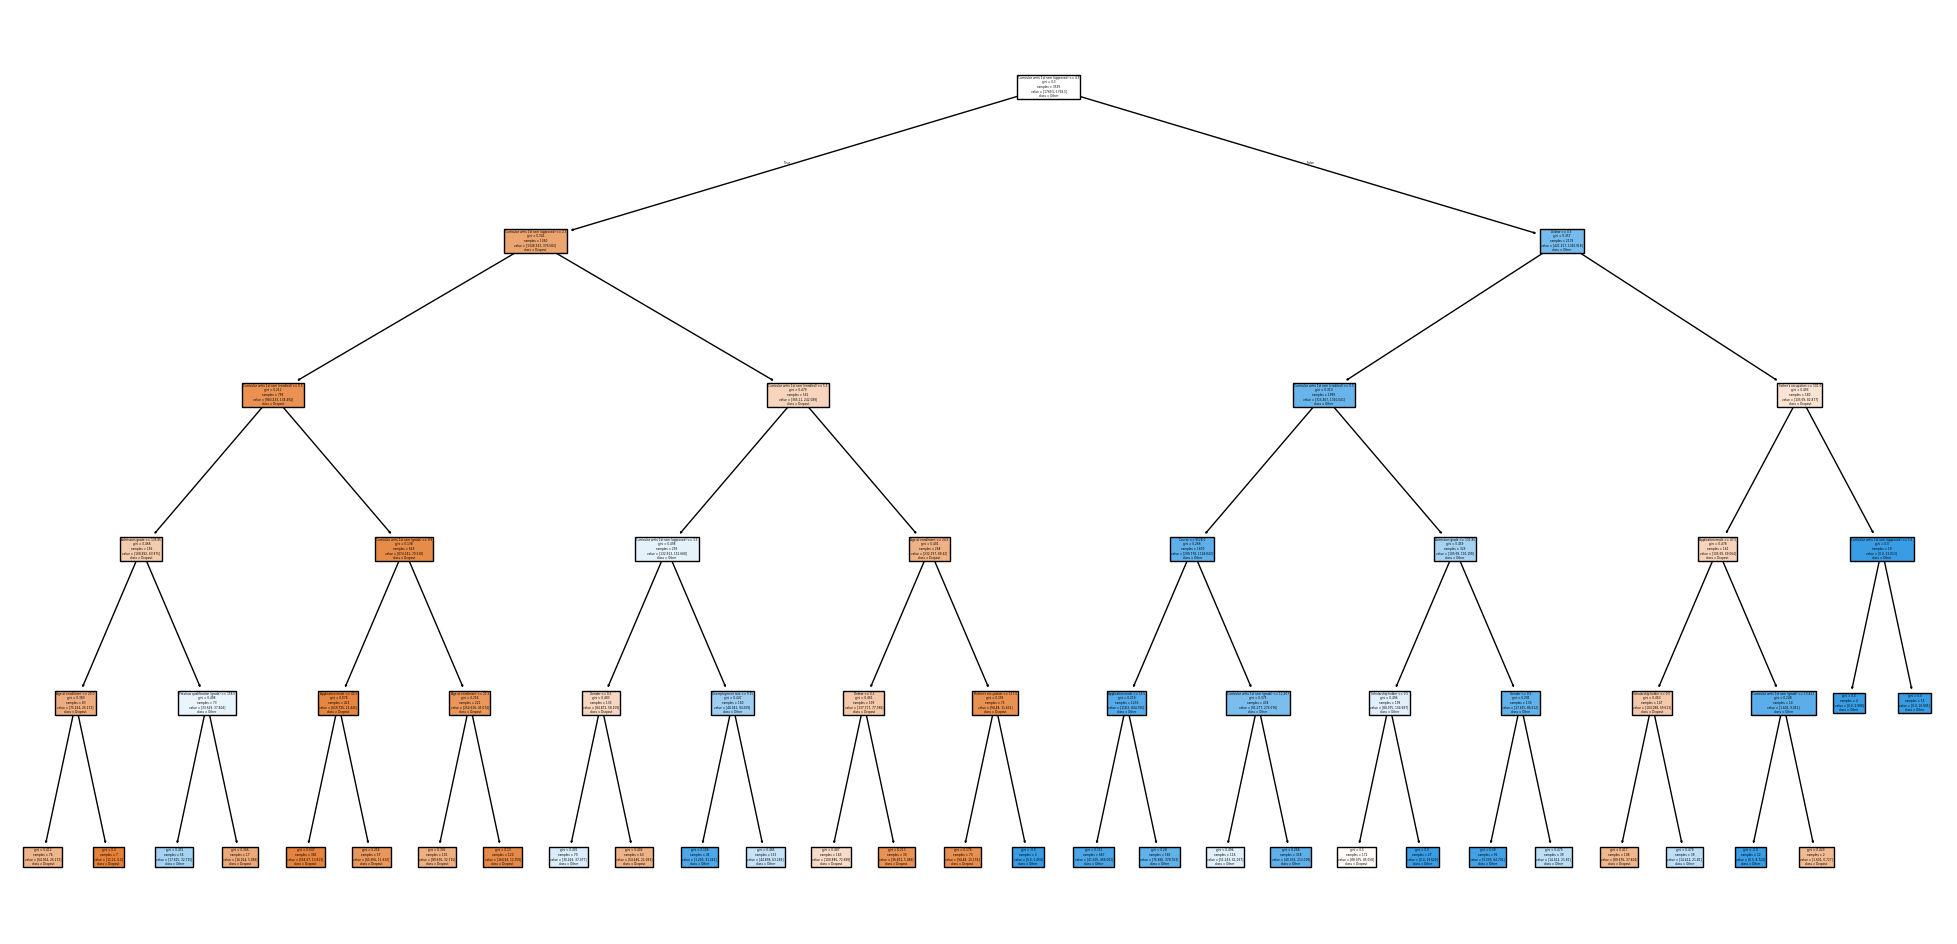

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 12))
plot_tree(model, feature_names=X.columns, class_names=model.classes_.astype(str), filled=True)
plt.show()

In [18]:
#Essayer un modèle plus puissant : Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8203389830508474
              precision    recall  f1-score   support

     Dropout       0.80      0.66      0.72       316
       Other       0.83      0.91      0.87       569

    accuracy                           0.82       885
   macro avg       0.82      0.78      0.80       885
weighted avg       0.82      0.82      0.82       885



In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7954802259887006
              precision    recall  f1-score   support

     Dropout       0.71      0.71      0.71       316
       Other       0.84      0.84      0.84       569

    accuracy                           0.80       885
   macro avg       0.78      0.78      0.78       885
weighted avg       0.80      0.80      0.80       885



In [20]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

y_pred = grid.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5}
Accuracy: 0.7932203389830509
              precision    recall  f1-score   support

     Dropout       0.76      0.62      0.68       316
       Other       0.81      0.89      0.85       569

    accuracy                           0.79       885
   macro avg       0.78      0.75      0.76       885
weighted avg       0.79      0.79      0.79       885



# Analyse de la base lycéenne 


In [21]:
dataMath = pd.read_csv('./data/student/student-mat.csv',sep=';',  dtype={0: str})
dataMath.head()

#school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;
# traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;
# internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<function matplotlib.pyplot.show(close=None, block=None)>

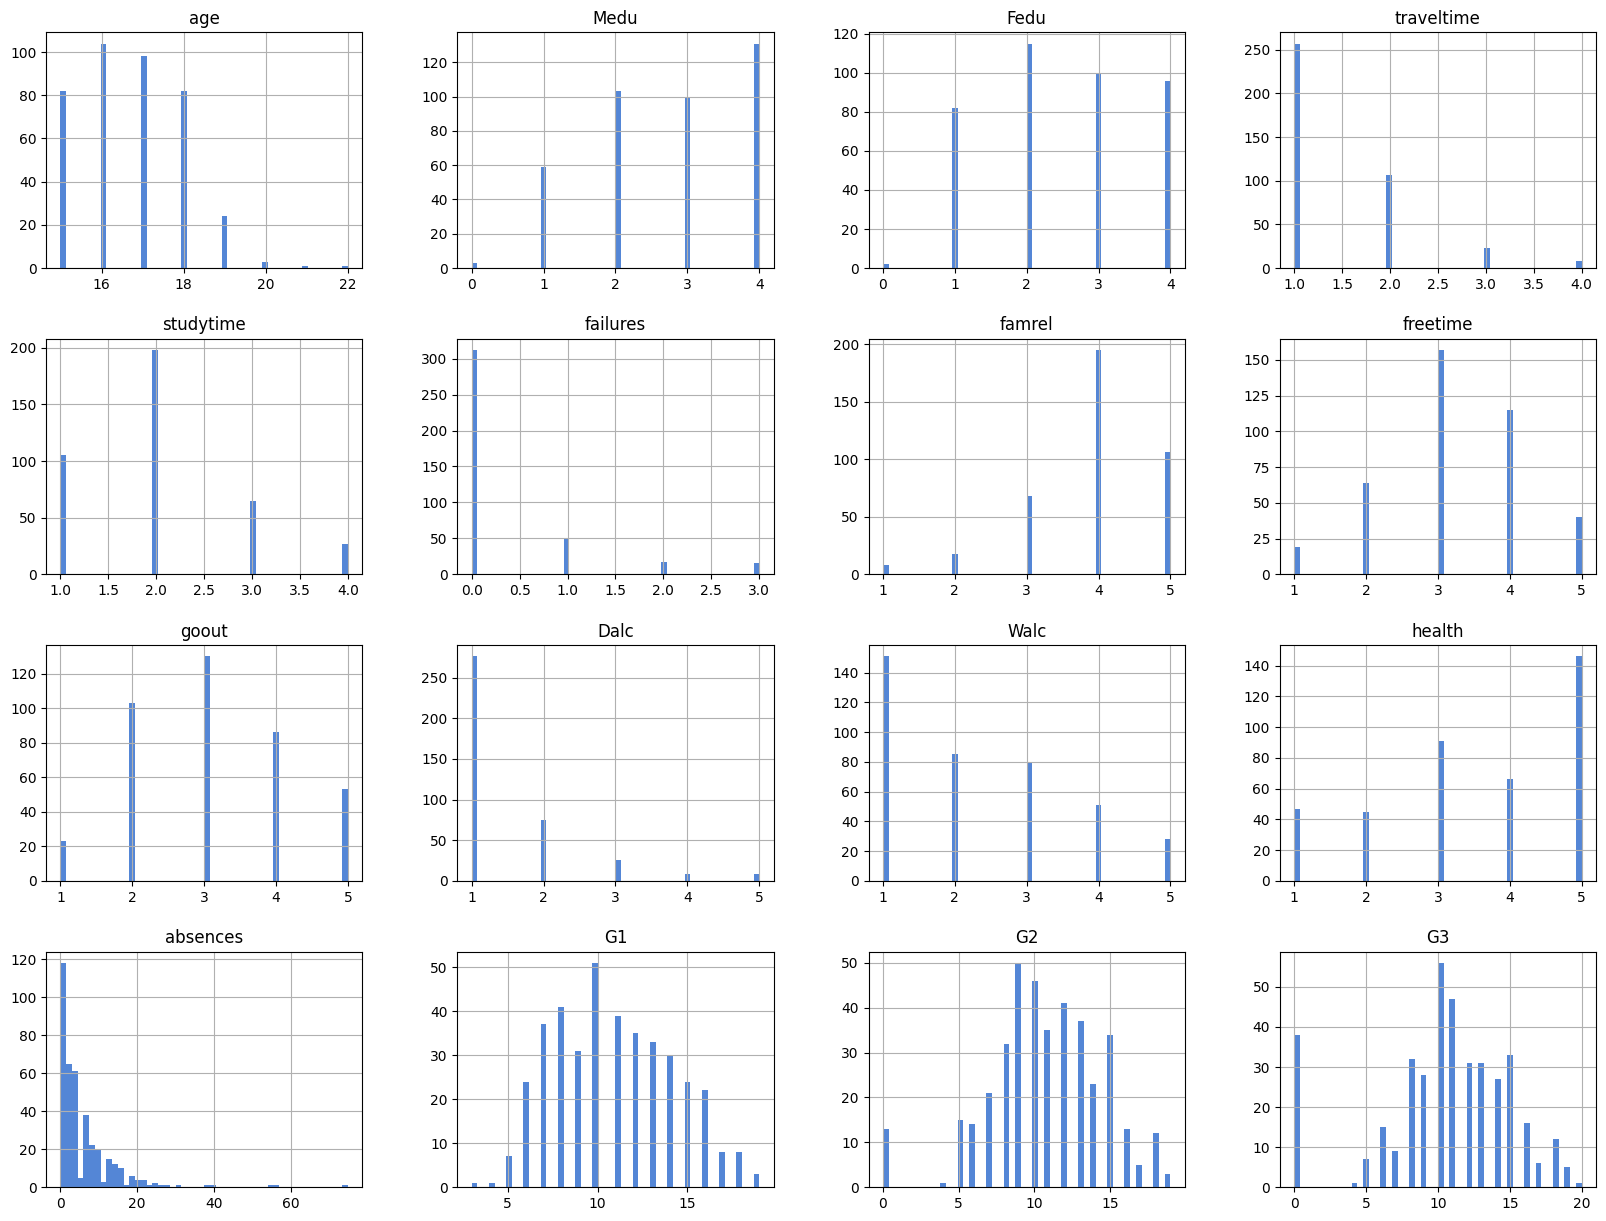

In [22]:
dataMath[dataMath.columns].hist(bins=50, figsize=(20,15), color='#5486d6')
plt.show

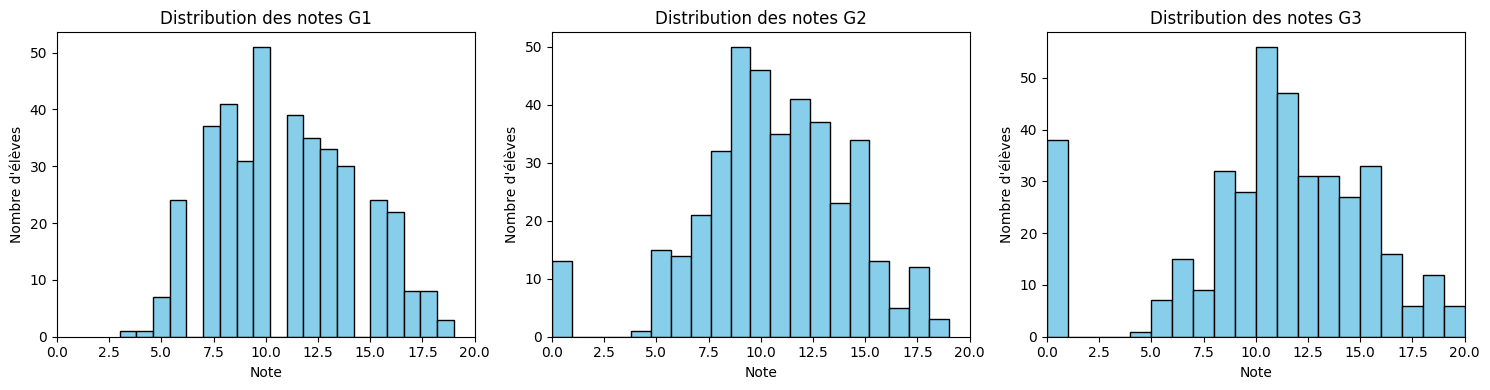

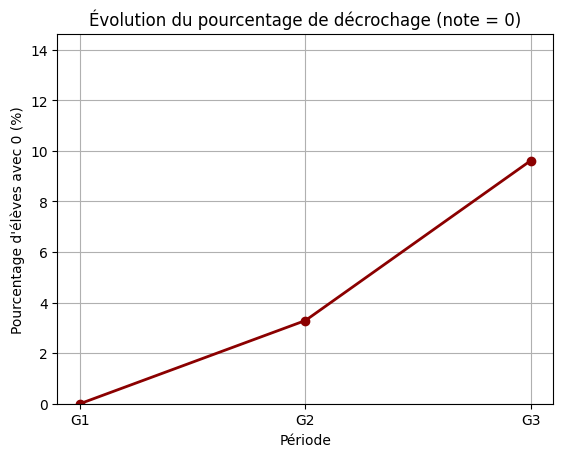

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(['G1', 'G2', 'G3']):
    axs[idx].hist(dataMath[col], bins=20, color='skyblue', edgecolor='black')
    axs[idx].set_title(f'Distribution des notes {col}')
    axs[idx].set_xlim(0, 20)
    axs[idx].set_xlabel('Note')
    axs[idx].set_ylabel('Nombre d\'élèves')

plt.tight_layout()
plt.show()


# Total d'élèves (lignes dans le dataset)
total_eleves = len(dataMath)

# Pourcentage de décrocheurs (note = 0) par période
zero_percentages = {
    'G1': (dataMath['G1'] == 0).sum() / total_eleves * 100,
    'G2': (dataMath['G2'] == 0).sum() / total_eleves * 100,
    'G3': (dataMath['G3'] == 0).sum() / total_eleves * 100
}

# Tracer le graphe en ligne
plt.plot(list(zero_percentages.keys()), list(zero_percentages.values()),
         marker='o', linestyle='-', color='darkred', linewidth=2)

plt.title("Évolution du pourcentage de décrochage (note = 0)")
plt.xlabel("Période")
plt.ylabel("Pourcentage d'élèves avec 0 (%)")
plt.ylim(0, max(zero_percentages.values()) + 5)
plt.grid(True)
plt.show()


In [24]:
dataPor = pd.read_csv('./data/student/student-por.csv',sep=';',  dtype={0: str})
dataPor.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


<function matplotlib.pyplot.show(close=None, block=None)>

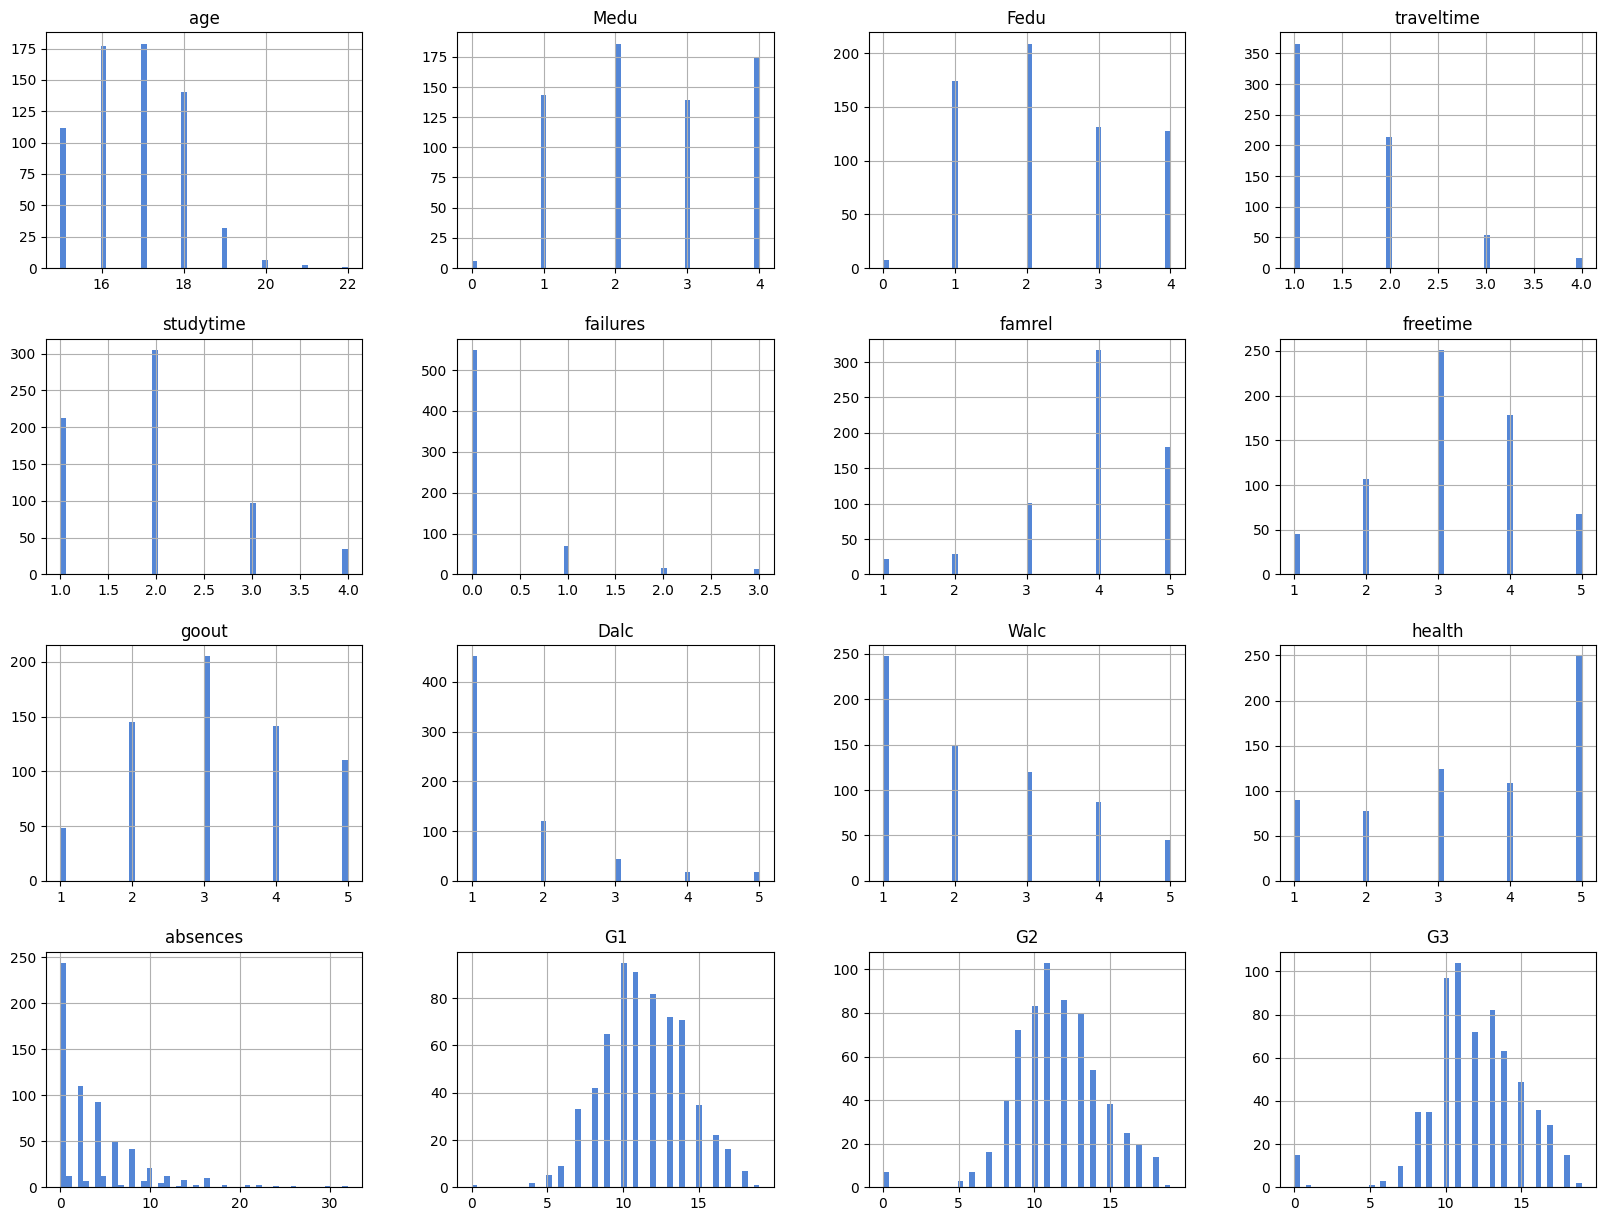

In [25]:
dataPor[dataPor.columns].hist(bins=50, figsize=(20,15), color='#5486d6')
plt.show

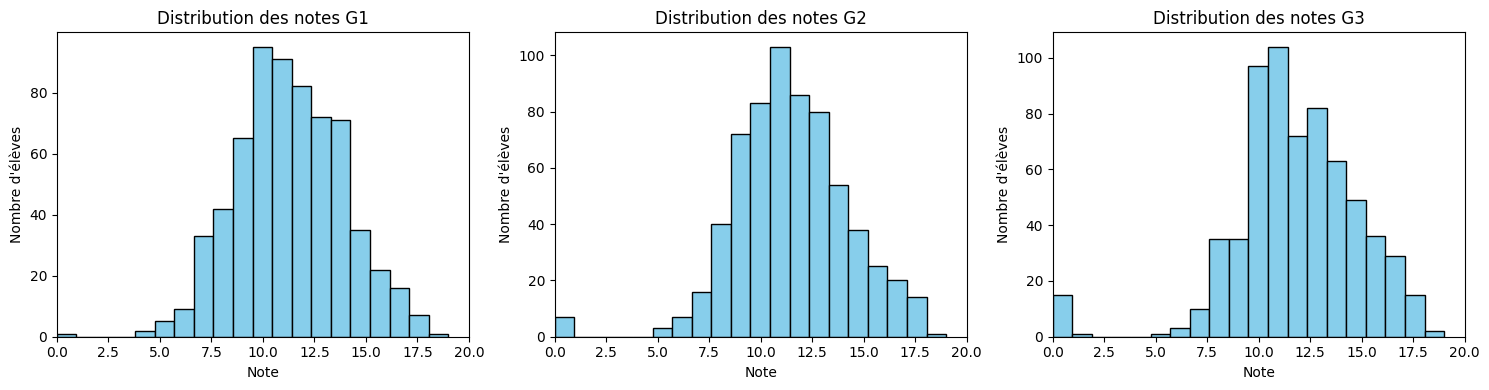

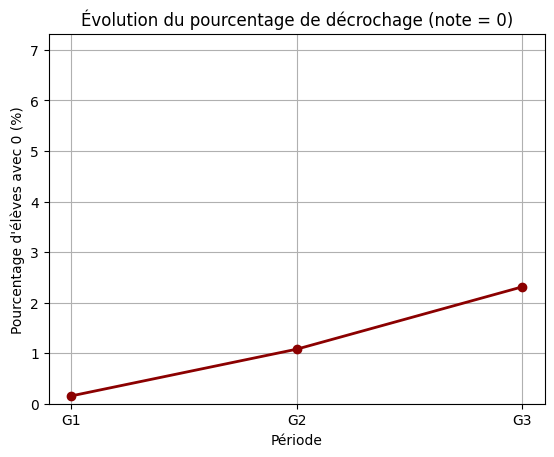

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(['G1', 'G2', 'G3']):
    axs[idx].hist(dataPor[col], bins=20, color='skyblue', edgecolor='black')
    axs[idx].set_title(f'Distribution des notes {col}')
    axs[idx].set_xlim(0, 20)
    axs[idx].set_xlabel('Note')
    axs[idx].set_ylabel('Nombre d\'élèves')

plt.tight_layout()
plt.show()


# Total d'élèves (lignes dans le dataset)
total_eleves = len(dataPor)

# Pourcentage de décrocheurs (note = 0) par période
zero_percentages = {
    'G1': (dataPor['G1'] == 0).sum() / total_eleves * 100,
    'G2': (dataPor['G2'] == 0).sum() / total_eleves * 100,
    'G3': (dataPor['G3'] == 0).sum() / total_eleves * 100
}

# Tracer le graphe en ligne
plt.plot(list(zero_percentages.keys()), list(zero_percentages.values()),
         marker='o', linestyle='-', color='darkred', linewidth=2)

plt.title("Évolution du pourcentage de décrochage (note = 0)")
plt.xlabel("Période")
plt.ylabel("Pourcentage d'élèves avec 0 (%)")
plt.ylim(0, max(zero_percentages.values()) + 5)
plt.grid(True)
plt.show()